In [17]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline  
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, MinimalFCParameters, EfficientFCParameters
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn import preprocessing
import sklearn.metrics as metrics
import numpy as np
import copy


In [18]:
sub1_bowing_features = pd.read_csv('sub1_Bowing_processed_normalized_features.csv')
sub2_bowing_features = pd.read_csv('sub2_Bowing_processed_normalized_features.csv')
sub3_bowing_features = pd.read_csv('sub3_Bowing_processed_normalized_features.csv')
sub4_bowing_features = pd.read_csv('sub4_Bowing_processed_normalized_features.csv')

sub1_clapping_features = pd.read_csv('sub1_Clapping_processed_normalized_features.csv')
sub2_clapping_features = pd.read_csv('sub2_Clapping_processed_normalized_features.csv')
sub3_clapping_features = pd.read_csv('sub3_Clapping_processed_normalized_features.csv')
sub4_clapping_features = pd.read_csv('sub4_Clapping_processed_normalized_features.csv')

sub1_handshaking_features = pd.read_csv('sub1_handshake_processed_normalized_features.csv')
sub2_handshaking_features = pd.read_csv('sub2_handshake_processed_normalized_features.csv')
sub3_handshaking_features = pd.read_csv('sub3_handshake_processed_normalized_features.csv')
sub4_handshaking_features = pd.read_csv('sub4_handshake_processed_normalized_features.csv')

sub1_hugging_features = pd.read_csv('sub1_Hugging_processed_normalized_features.csv')
sub2_hugging_features = pd.read_csv('sub2_Hugging_processed_normalized_features.csv')
sub3_hugging_features = pd.read_csv('sub3_Hugging_processed_normalized_features.csv')
sub4_hugging_features = pd.read_csv('sub4_Hugging_processed_normalized_features.csv')

sub1_jumping_features = pd.read_csv('sub1_jumping_processed_normalized_features.csv')
sub2_jumping_features = pd.read_csv('sub2_jumping_processed_normalized_features.csv')
sub3_jumping_features = pd.read_csv('sub3_jumping_processed_normalized_features.csv')
sub4_jumping_features = pd.read_csv('sub4_jumping_processed_normalized_features.csv')

sub1_running_features = pd.read_csv('sub1_Running_processed_normalized_features.csv')
sub2_running_features = pd.read_csv('sub2_Running_processed_normalized_features.csv')
sub3_running_features = pd.read_csv('sub3_Running_processed_normalized_features.csv')
sub4_running_features = pd.read_csv('sub4_Running_processed_normalized_features.csv')

sub1_seating_features = pd.read_csv('sub1_Seating_processed_normalized_features.csv')
sub2_seating_features = pd.read_csv('sub2_Seating_processed_normalized_features.csv')
sub3_seating_features = pd.read_csv('sub3_Seating_processed_normalized_features.csv')
sub4_seating_features = pd.read_csv('sub4_Seating_processed_normalized_features.csv')

sub1_standing_features = pd.read_csv('sub1_Standing_processed_normalized_features.csv')
sub2_standing_features = pd.read_csv('sub2_Standing_processed_normalized_features.csv')
sub3_standing_features = pd.read_csv('sub3_Standing_processed_normalized_features.csv')
sub4_standing_features = pd.read_csv('sub4_Standing_processed_normalized_features.csv')

sub1_walking_features = pd.read_csv('sub1_Walking_processed_normalized_features.csv')
sub2_walking_features = pd.read_csv('sub2_Walking_processed_normalized_features.csv')
sub3_walking_features = pd.read_csv('sub3_Walking_processed_normalized_features.csv')
sub4_walking_features = pd.read_csv('sub4_Walking_processed_normalized_features.csv')

sub1_waving_features = pd.read_csv('sub1_Waving_processed_normalized_features.csv')
sub2_waving_features = pd.read_csv('sub2_Waving_processed_normalized_features.csv')
sub3_waving_features = pd.read_csv('sub3_Waving_processed_normalized_features.csv')
sub4_waving_features = pd.read_csv('sub4_Waving_processed_normalized_features.csv')


In [25]:
sub4_waving_features

,id,L-Bic__abs_energy,L-Bic__absolute_sum_of_changes,"L-Bic__agg_autocorrelation__f_agg_""mean""","L-Bic__agg_autocorrelation__f_agg_""median""","L-Bic__agg_autocorrelation__f_agg_""var""","L-Bic__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","L-Bic__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","L-Bic__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","L-Bic__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""",...,R-Tri__time_reversal_asymmetry_statistic__lag_1,R-Tri__time_reversal_asymmetry_statistic__lag_2,R-Tri__time_reversal_asymmetry_statistic__lag_3,R-Tri__value_count__value_-inf,R-Tri__value_count__value_0,R-Tri__value_count__value_1,R-Tri__value_count__value_inf,R-Tri__value_count__value_nan,R-Tri__variance,R-Tri__variance_larger_than_standard_deviation
0,0,988734.015307,1310.183376,0.514321,0.493853,0.054968,24.652033,-0.139705,-0.035682,0.017973,...,-1341.293596,-2259.809337,-2936.312912,0.0,0.0,0.0,0.0,0.0,637.204820,1.0
1,1,984086.763106,1247.162902,0.559895,0.565766,0.084425,19.804938,0.046215,0.010620,0.016313,...,-167.982135,-343.933464,-525.461616,0.0,0.0,0.0,0.0,0.0,540.644907,1.0
2,2,989243.010815,1249.170228,0.557352,0.563571,0.085356,23.200617,-0.097404,-0.022256,0.016161,...,234.844086,511.344748,834.205489,0.0,0.0,0.0,0.0,0.0,556.536187,1.0
3,3,790257.636879,1153.336171,0.496310,0.490102,0.102013,19.293428,0.007468,0.001372,0.013059,...,-20.172914,-35.283059,-44.942181,0.0,0.0,0.0,0.0,0.0,502.548960,1.0
4,4,793816.382358,1165.766502,0.495896,0.489042,0.101808,20.969914,-0.080116,-0.014714,0.013010,...,0.090085,-7.182142,-18.622009,0.0,0.0,0.0,0.0,0.0,510.596494,1.0
5,5,865219.048176,1227.609129,0.489484,0.488040,0.107039,20.826573,-0.029354,-0.005791,0.014015,...,-45.966419,-105.395113,-173.775457,0.0,0.0,0.0,0.0,0.0,458.153037,1.0
6,6,862303.276290,1215.096410,0.493886,0.493390,0.105364,23.167251,-0.151811,-0.029993,0.013878,...,19.317255,24.525937,16.498945,0.0,0.0,0.0,0.0,0.0,484.522335,1.0
7,7,690876.774534,1089.908694,0.455883,0.440542,0.112992,18.700962,0.004801,0.000693,0.010252,...,227.303167,520.741955,830.616902,0.0,0.0,0.0,0.0,0.0,554.142322,1.0
8,8,685839.302933,1068.002992,0.462978,0.444701,0.109232,19.635519,-0.066958,-0.009643,0.010212,...,-215.467454,-484.911147,-744.285587,0.0,0.0,0.0,0.0,0.0,499.326292,1.0
9,9,936927.933689,1203.449673,0.535072,0.540845,0.094540,17.962152,0.114205,0.025084,0.015507,...,1522.078964,2975.065680,4302.719593,0.0,0.0,0.0,0.0,0.0,543.868838,1.0


In [19]:
sub1_frontkicking_features = pd.read_csv('sub1_frontkicking_processed_normalized_features.csv')
sub2_frontkicking_features = pd.read_csv('sub2_frontkicking_processed_normalized_features.csv')
sub3_frontkicking_features = pd.read_csv('sub3_frontkicking_processed_normalized_features.csv')
sub4_frontkicking_features = pd.read_csv('sub4_frontkicking_processed_normalized_features.csv')

sub1_elbowing_features = pd.read_csv('sub1_elbowing_processed_normalized_features.csv')
sub2_elbowing_features = pd.read_csv('sub2_elbowing_processed_normalized_features.csv')
sub3_elbowing_features = pd.read_csv('sub3_elbowing_processed_normalized_features.csv')
sub4_elbowing_features = pd.read_csv('sub4_elbowing_processed_normalized_features.csv')

sub1_hammering_features = pd.read_csv('sub1_Hammering_processed_normalized_features.csv')
sub2_hammering_features = pd.read_csv('sub2_Hammering_processed_normalized_features.csv')
sub3_hammering_features = pd.read_csv('sub3_Hammering_processed_normalized_features.csv')
sub4_hammering_features = pd.read_csv('sub4_Hammering_processed_normalized_features.csv')

sub1_headering_features = pd.read_csv('sub1_Headering_processed_normalized_features.csv')
sub2_headering_features = pd.read_csv('sub2_Headering_processed_normalized_features.csv')
sub3_headering_features = pd.read_csv('sub3_Headering_processed_normalized_features.csv')
sub4_headering_features = pd.read_csv('sub4_Headering_processed_normalized_features.csv')

sub1_kneeing_features = pd.read_csv('sub1_Kneeing_processed_normalized_features.csv')
sub2_kneeing_features = pd.read_csv('sub2_Kneeing_processed_normalized_features.csv')
sub3_kneeing_features = pd.read_csv('sub3_Kneeing_processed_normalized_features.csv')
sub4_kneeing_features = pd.read_csv('sub4_Kneeing_processed_normalized_features.csv')

sub1_pulling_features = pd.read_csv('sub1_pulling_processed_normalized_features.csv')
sub2_pulling_features = pd.read_csv('sub2_pulling_processed_normalized_features.csv')
sub3_pulling_features = pd.read_csv('sub3_pulling_processed_normalized_features.csv')
sub4_pulling_features = pd.read_csv('sub4_pulling_processed_normalized_features.csv')

sub1_punching_features = pd.read_csv('sub1_punching_processed_normalized_features.csv')
sub2_punching_features = pd.read_csv('sub2_punching_processed_normalized_features.csv')
sub3_punching_features = pd.read_csv('sub3_punching_processed_normalized_features.csv')
sub4_punching_features = pd.read_csv('sub4_punching_processed_normalized_features.csv')

sub1_pushing_features = pd.read_csv('sub1_pushing_processed_normalized_features.csv')
sub2_pushing_features = pd.read_csv('sub2_pushing_processed_normalized_features.csv')
sub3_pushing_features = pd.read_csv('sub3_pushing_processed_normalized_features.csv')
sub4_pushing_features = pd.read_csv('sub4_pushing_processed_normalized_features.csv')

sub1_sidekicking_features = pd.read_csv('sub1_sidekicking_processed_normalized_features.csv')
sub2_sidekicking_features = pd.read_csv('sub2_sidekicking_processed_normalized_features.csv')
sub3_sidekicking_features = pd.read_csv('sub3_sidekicking_processed_normalized_features.csv')
sub4_sidekicking_features = pd.read_csv('sub4_sidekicking_processed_normalized_features.csv')

sub1_slapping_features = pd.read_csv('sub1_slapping_processed_normalized_features.csv')
sub2_slapping_features = pd.read_csv('sub2_slapping_processed_normalized_features.csv')
sub3_slapping_features = pd.read_csv('sub3_slapping_processed_normalized_features.csv')
sub4_slapping_features = pd.read_csv('sub4_slapping_processed_normalized_features.csv')


In [20]:
sub4_slapping_features.shape

(41, 6305)

In [5]:
# Assigning labels to Handshake as 0 and punching as 1

sub1_handshaking_features = sub1_handshaking_features.assign(label = [0]*len(sub1_handshaking_features))
sub2_handshaking_features = sub2_handshaking_features.assign(label = [0]*len(sub2_handshaking_features))
sub3_handshaking_features = sub3_handshaking_features.assign(label = [0]*len(sub3_handshaking_features))
sub4_handshaking_features = sub4_handshaking_features.assign(label = [0]*len(sub4_handshaking_features))

sub1_bowing_features = sub1_bowing_features.assign(label = [0]*len(sub1_bowing_features))
sub2_bowing_features = sub2_bowing_features.assign(label = [0]*len(sub2_bowing_features))
sub3_bowing_features = sub3_bowing_features.assign(label = [0]*len(sub3_bowing_features))
sub4_bowing_features = sub4_bowing_features.assign(label = [0]*len(sub4_bowing_features))

sub1_clapping_features = sub1_clapping_features.assign(label = [0]*len(sub1_clapping_features))
sub2_clapping_features = sub2_clapping_features.assign(label = [0]*len(sub2_clapping_features))
sub3_clapping_features = sub3_clapping_features.assign(label = [0]*len(sub3_clapping_features))
sub4_clapping_features = sub4_clapping_features.assign(label = [0]*len(sub4_clapping_features))

sub1_hugging_features = sub1_hugging_features.assign(label = [0]*len(sub1_hugging_features))
sub2_hugging_features = sub2_hugging_features.assign(label = [0]*len(sub2_hugging_features))
sub3_hugging_features = sub3_hugging_features.assign(label = [0]*len(sub3_hugging_features))
sub4_hugging_features = sub4_hugging_features.assign(label = [0]*len(sub4_hugging_features))

sub1_jumping_features = sub1_jumping_features.assign(label = [0]*len(sub1_jumping_features))
sub2_jumping_features = sub2_jumping_features.assign(label = [0]*len(sub2_jumping_features))
sub3_jumping_features = sub3_jumping_features.assign(label = [0]*len(sub3_jumping_features))
sub4_jumping_features = sub4_jumping_features.assign(label = [0]*len(sub4_jumping_features))

sub1_running_features = sub1_running_features.assign(label = [0]*len(sub1_running_features))
sub2_running_features = sub2_running_features.assign(label = [0]*len(sub2_running_features))
sub3_running_features = sub3_running_features.assign(label = [0]*len(sub3_running_features))
sub4_running_features = sub4_running_features.assign(label = [0]*len(sub4_running_features))

sub1_seating_features = sub1_seating_features.assign(label = [0]*len(sub1_seating_features))
sub2_seating_features = sub2_seating_features.assign(label = [0]*len(sub2_seating_features))
sub3_seating_features = sub3_seating_features.assign(label = [0]*len(sub3_seating_features))
sub4_seating_features = sub4_seating_features.assign(label = [0]*len(sub4_seating_features))

sub1_standing_features = sub1_standing_features.assign(label = [0]*len(sub1_standing_features))
sub2_standing_features = sub2_standing_features.assign(label = [0]*len(sub2_standing_features))
sub3_standing_features = sub3_standing_features.assign(label = [0]*len(sub3_standing_features))
sub4_standing_features = sub4_standing_features.assign(label = [0]*len(sub4_standing_features))

sub1_walking_features = sub1_walking_features.assign(label = [0]*len(sub1_walking_features))
sub2_walking_features = sub2_walking_features.assign(label = [0]*len(sub2_walking_features))
sub3_walking_features = sub3_walking_features.assign(label = [0]*len(sub3_walking_features))
sub4_walking_features = sub4_walking_features.assign(label = [0]*len(sub4_walking_features))

sub1_waving_features = sub1_waving_features.assign(label = [0]*len(sub1_waving_features))
sub2_waving_features = sub2_waving_features.assign(label = [0]*len(sub2_waving_features))
sub3_waving_features = sub3_waving_features.assign(label = [0]*len(sub3_waving_features))
sub4_waving_features = sub4_waving_features.assign(label = [0]*len(sub4_waving_features))


In [6]:
sub1_punching_features = sub1_punching_features.assign(label = [1]*len(sub1_punching_features))
sub2_punching_features = sub2_punching_features.assign(label = [1]*len(sub2_punching_features))
sub3_punching_features = sub3_punching_features.assign(label = [1]*len(sub3_punching_features))
sub4_punching_features = sub4_punching_features.assign(label = [1]*len(sub4_punching_features))

sub1_frontkicking_features = sub1_frontkicking_features.assign(label = [1]*len(sub1_frontkicking_features))
sub2_frontkicking_features = sub2_frontkicking_features.assign(label = [1]*len(sub2_frontkicking_features))
sub3_frontkicking_features = sub3_frontkicking_features.assign(label = [1]*len(sub3_frontkicking_features))
sub4_frontkicking_features = sub4_frontkicking_features.assign(label = [1]*len(sub4_frontkicking_features))

sub1_elbowing_features = sub1_elbowing_features.assign(label = [1]*len(sub1_elbowing_features))
sub2_elbowing_features = sub2_elbowing_features.assign(label = [1]*len(sub2_elbowing_features))
sub3_elbowing_features = sub3_elbowing_features.assign(label = [1]*len(sub3_elbowing_features))
sub4_elbowing_features = sub4_elbowing_features.assign(label = [1]*len(sub4_elbowing_features))

sub1_hammering_features = sub1_hammering_features.assign(label = [1]*len(sub1_hammering_features))
sub2_hammering_features = sub2_hammering_features.assign(label = [1]*len(sub2_hammering_features))
sub3_hammering_features = sub3_hammering_features.assign(label = [1]*len(sub3_hammering_features))
sub4_hammering_features = sub4_hammering_features.assign(label = [1]*len(sub4_hammering_features))

sub1_headering_features = sub1_headering_features.assign(label = [1]*len(sub1_headering_features))
sub2_headering_features = sub2_headering_features.assign(label = [1]*len(sub2_headering_features))
sub3_headering_features = sub3_headering_features.assign(label = [1]*len(sub3_headering_features))
sub4_headering_features = sub4_headering_features.assign(label = [1]*len(sub4_headering_features))

sub1_kneeing_features = sub1_kneeing_features.assign(label = [1]*len(sub1_kneeing_features))
sub2_kneeing_features = sub2_kneeing_features.assign(label = [1]*len(sub2_kneeing_features))
sub3_kneeing_features = sub3_kneeing_features.assign(label = [1]*len(sub3_kneeing_features))
sub4_kneeing_features = sub4_kneeing_features.assign(label = [1]*len(sub4_kneeing_features))

sub1_pulling_features = sub1_pulling_features.assign(label = [1]*len(sub1_pulling_features))
sub2_pulling_features = sub2_pulling_features.assign(label = [1]*len(sub2_pulling_features))
sub3_pulling_features = sub3_pulling_features.assign(label = [1]*len(sub3_pulling_features))
sub4_pulling_features = sub4_pulling_features.assign(label = [1]*len(sub4_pulling_features))

sub1_punching_features = sub1_punching_features.assign(label = [1]*len(sub1_punching_features))
sub2_punching_features = sub2_punching_features.assign(label = [1]*len(sub2_punching_features))
sub3_punching_features = sub3_punching_features.assign(label = [1]*len(sub3_punching_features))
sub4_punching_features = sub4_punching_features.assign(label = [1]*len(sub4_punching_features))

sub1_pushing_features = sub1_pushing_features.assign(label = [1]*len(sub1_pushing_features))
sub2_pushing_features = sub2_pushing_features.assign(label = [1]*len(sub2_pushing_features))
sub3_pushing_features = sub3_pushing_features.assign(label = [1]*len(sub3_pushing_features))
sub4_pushing_features = sub4_pushing_features.assign(label = [1]*len(sub4_pushing_features))

sub1_sidekicking_features = sub1_sidekicking_features.assign(label = [1]*len(sub1_sidekicking_features))
sub2_sidekicking_features = sub2_sidekicking_features.assign(label = [1]*len(sub2_sidekicking_features))
sub3_sidekicking_features = sub3_sidekicking_features.assign(label = [1]*len(sub3_sidekicking_features))
sub4_sidekicking_features = sub4_sidekicking_features.assign(label = [1]*len(sub4_sidekicking_features))

sub1_slapping_features = sub1_slapping_features.assign(label = [1]*len(sub1_slapping_features))
sub2_slapping_features = sub2_slapping_features.assign(label = [1]*len(sub2_slapping_features))
sub3_slapping_features = sub3_slapping_features.assign(label = [1]*len(sub3_slapping_features))
sub4_slapping_features = sub4_slapping_features.assign(label = [1]*len(sub4_slapping_features))

In [7]:
subject1 = pd.concat([sub1_handshaking_features,sub1_punching_features,sub1_seating_features,sub1_standing_features,sub1_pushing_features,sub1_pulling_features,sub1_slapping_features,sub1_sidekicking_features,sub1_frontkicking_features,sub1_kneeing_features,sub1_hammering_features, sub1_hugging_features,sub1_headering_features,sub1_jumping_features,sub1_bowing_features,sub1_elbowing_features,sub1_running_features,sub1_walking_features,sub1_clapping_features,sub1_waving_features])
subject2 = pd.concat([sub2_handshaking_features,sub2_punching_features,sub2_seating_features,sub2_standing_features,sub2_pushing_features,sub2_pulling_features,sub2_slapping_features,sub2_sidekicking_features,sub2_frontkicking_features,sub2_kneeing_features,sub2_hammering_features, sub2_hugging_features,sub2_headering_features,sub2_jumping_features,sub2_bowing_features,sub2_elbowing_features,sub2_running_features,sub2_walking_features,sub2_clapping_features,sub2_waving_features])
subject3 = pd.concat([sub3_handshaking_features,sub3_punching_features,sub3_seating_features,sub3_standing_features,sub3_pushing_features,sub3_pulling_features,sub3_slapping_features,sub3_sidekicking_features,sub3_frontkicking_features,sub3_kneeing_features,sub3_hammering_features, sub3_hugging_features,sub3_headering_features,sub3_jumping_features,sub3_bowing_features,sub3_elbowing_features,sub3_running_features,sub3_walking_features,sub3_clapping_features,sub3_waving_features])
subject4 = pd.concat([sub4_handshaking_features,sub4_punching_features,sub4_seating_features,sub4_standing_features,sub4_pushing_features,sub4_pulling_features,sub4_slapping_features,sub4_sidekicking_features,sub4_frontkicking_features,sub4_kneeing_features,sub4_hammering_features, sub4_hugging_features,sub4_headering_features,sub4_jumping_features,sub4_bowing_features,sub4_elbowing_features,sub4_running_features,sub4_walking_features,sub4_clapping_features,sub4_waving_features])


In [9]:
#Standardizing
X = subject1.copy()
labeled = list(X.loc[:,'label'])
X = X.drop(['label'],axis = 1)
scaler = preprocessing.StandardScaler().fit(X)
X_scaled = scaler.transform(X)                           
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = X.columns
subject1 = X_scaled
subject1 = subject1.assign(label = labeled)

query = subject2.copy()
labeled = list(query.loc[:,'label'])
query = query.drop(['label'],axis = 1)
query_scaled = scaler.transform(query)
query_scaled = pd.DataFrame(query_scaled)
query_scaled.columns = query.columns
subject2 = query_scaled
subject2 = subject2.assign(label = labeled)


query = subject3.copy()
labeled = list(query.loc[:,'label'])
query = query.drop(['label'],axis = 1)
query_scaled = scaler.transform(query)
query_scaled = pd.DataFrame(query_scaled)
query_scaled.columns = query.columns
subject3 = query_scaled
subject3 = subject3.assign(label = labeled)


query = subject4.copy()
labeled = list(query.loc[:,'label'])
query = query.drop(['label'],axis = 1)
query_scaled = scaler.transform(query)
query_scaled = pd.DataFrame(query_scaled)
query_scaled.columns = query.columns
subject4 = query_scaled
subject4 = subject4.assign(label = labeled)


In [10]:
def get_pred_default(train,test):
    
    n,m = train.shape 
    X = train.iloc[:,:m-1]# get training input data
    query = test.iloc[:,:m-1]# get test input data
    
    #Get the frequently occuring category in training data
    arity_name, arity_freq = np.unique(train.iloc[:,m-1], return_counts = True)
    for i in range(0,len(arity_freq)):
        if(arity_freq[i] == max(arity_freq)):
            pred_def = i
            prob = float(arity_freq[i])/float(len(train))
    predicted_response = [pred_def]*len(test)
    predicted_prob = [prob]*len(test)
    return pd.DataFrame({'Predicted':predicted_response, 'Actual':test.iloc[:,m-1], 'Probability':predicted_prob})

def get_pred_nb(train,test):
    n,m = train.shape # number of rows and columns
    X = train.iloc[:,:m-1]# get training input data
    query = test.iloc[:,:m-1]# get test input data
    gnb = GaussianNB()
    gnb.fit(X,train.iloc[:,m-1])
    predicted_response = gnb.predict(query)
    predicted_prob = gnb.predict_proba(query)[:, 1]
    return pd.DataFrame({'Predicted':predicted_response, 'Actual':test.iloc[:,m-1], 'Probability':predicted_prob})

def get_pred_logreg(train,test):
    n,m = train.shape # number of rows and columns
    X = train.iloc[:,:m-1]# get training input data
    y = train.iloc[:,m-1]
    query = test.iloc[:,:m-1]# get test input data
    lm = LogisticRegression()
    lm.fit(X,y)
    predicted_response = lm.predict(query)
    predicted_prob = lm.predict_proba(query)[:, 1]
    return pd.DataFrame({'Predicted':predicted_response, 'Actual':test.iloc[:,m-1], 'Probability':predicted_prob})

def get_pred_rf(train,test):
    n,m = train.shape # number of rows and columns
    X = train.iloc[:,:m-1]# get training input data
    y = train.iloc[:,m-1]
    query = test.iloc[:,:m-1]
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(X,y)
    predicted_response = rf.predict(query)
    predicted_prob = rf.predict_proba(query)[:, 1]
    return pd.DataFrame({'Predicted':predicted_response, 'Actual':test.iloc[:,m-1], 'Probability':predicted_prob})
    


    

In [11]:
def get_metrics(pred, cutoff=0.5):
    
    predicted_output = [float(i) for i in pred.loc[:,'Predicted']] # first column of list are the Predicted values
    actual_output = [float(i) for i in pred.loc[:,'Actual']] # Second column of list are the Actual values
    # returns list = [[FALSE, TRUE][IF CONDITION] FOR a row in LIST]
    predicted_output_manipulate = [[0, 1][x > cutoff] for x in predicted_output] # can also be performed by map(lambda x: [0, 1][x > cutoff], predicted_output)

    n11_TP = sum([[0, 1][predicted_output_manipulate[i] == 1 and actual_output[i] == 1] for i in range(len(predicted_output))])
    n00_TN = sum([[0, 1][predicted_output_manipulate[i] == 0 and actual_output[i] == 0] for i in range(len(predicted_output))])
    n10_FN = sum([[0, 1][predicted_output_manipulate[i] == 0 and actual_output[i] == 1] for i in range(len(predicted_output))])
    n01_FP = sum([[0, 1][predicted_output_manipulate[i] == 1 and actual_output[i] == 0] for i in range(len(predicted_output))])
    Pos = n11_TP + n10_FN
    Neg = n01_FP + n00_TN
    PPos = n11_TP + n01_FP
    PNeg = n10_FN + n00_TN
    
    if(Neg == 0):
        Accuracy = float(n11_TP+n00_TN)/float(Pos+Neg)
        Recall = float(n11_TP)/float(Pos)
        Precision = float(n11_TP)/float(PPos)
        TP_rate = float(n11_TP)/float(Pos)
        FP_rate = 'N/A'
    elif(Pos == 0):
        TP_rate = 'N/A'
        FP_rate = float(n01_FP)/float(Neg)
        Accuracy = float(n11_TP+n00_TN)/float(Pos+Neg)
        Precision = float(n11_TP)/float(PPos)
        Recall = 'N/A'
    elif(PPos == 0):
        TP_rate = float(n11_TP)/float(Pos)
        FP_rate = float(n01_FP)/float(Neg)
        Accuracy = float(n11_TP+n00_TN)/float(Pos+Neg)
        Precision = 'N/A'
        Recall = float(n11_TP)/float(Pos)
    else:
        TP_rate = float(n11_TP)/float(Pos)
        FP_rate = float(n01_FP)/float(Neg)
        Accuracy = float(n11_TP+n00_TN)/float(Pos+Neg)
        Precision = float(n11_TP)/float(PPos)
        Recall = float(n11_TP)/float(Pos)
   
    print(pd.DataFrame({'True Positive Rate':TP_rate, 'False Positive Rate':FP_rate, 'Accuracy':Accuracy, 'Precision':Precision, 'Recall':Recall}, index = [0]))
    
    return Accuracy, Precision, Recall 

In [12]:
def print_cont_table(pred, cutoff=0.5):

    predicted_output = [float(i) for i in pred.loc[:,'Predicted']] # first column of list are the Predicted values
    actual_output = [float(i) for i in pred.loc[:,'Actual']] # Second column of list are the Actual values
    predicted_output_manipulate = [[0, 1][x > cutoff] for x in predicted_output] # can also be performed by map(lambda x: [0, 1][x > cutoff], predicted_output)

    n11_TP = sum([[0, 1][predicted_output_manipulate[i] == 1 and actual_output[i] == 1] for i in range(len(predicted_output))])
    n00_TN = sum([[0, 1][predicted_output_manipulate[i] == 0 and actual_output[i] == 0] for i in range(len(predicted_output))])
    n10_FN = sum([[0, 1][predicted_output_manipulate[i] == 0 and actual_output[i] == 1] for i in range(len(predicted_output))])
    n01_FP = sum([[0, 1][predicted_output_manipulate[i] == 1 and actual_output[i] == 0] for i in range(len(predicted_output))])
    Pos = n11_TP + n10_FN
    Neg = n01_FP + n00_TN
    PPos = n11_TP + n01_FP
    PNeg = n10_FN + n00_TN
    print ("           |  PPos \t PNeg \t | Sums")
    print ("-------------------------------------")
    print ("actual pos |  %d \t %d \t | %d" % (n11_TP, n10_FN, Pos))
    print ("actual neg |  %d \t %d \t | %d" % (n01_FP, n00_TN, Neg))
    print ("-------------------------------------")
    print ("Sums       |  %d \t %d \t | %d" % (PPos, PNeg, (Pos+Neg)))
    return None

In [26]:
def crossvalidate(subject1, subject2, subject3, subject4):
    trainlist = [subject1, subject2, subject3, subject4]
    Accuracy1_array = []
    Accuracy2_array = []
    Accuracy3_array = []
    Accuracy0_array = []
    default_test = []
    default_prob = []
    log_test = []
    log_prob = []
    nb_test = []
    nb_prob = []
    rf_test = []
    rf_prob = []
    
    for i in range(0,len(trainlist)):
        templist = copy.deepcopy(trainlist)
        test = templist[i]
        templist.pop(i)
        train = pd.concat(templist)
        print('\nLeave subject '+str(i+1)+' out\n')
        print('Default model\n')
        check = get_pred_default(train,test)
        print_cont_table(check)
        Accuracy0, Precision0, Recall0  = get_metrics(check)
        y_test = check.loc[:,'Actual']
        default_test = np.append(default_test,y_test)
        y_prob = check.loc[:,'Probability']
        default_prob = np.append(default_prob,y_prob)
        fpr_d, tpr_d, _ = roc_curve(y_test, y_prob)
        roc_auc_d = metrics.auc(fpr_d, tpr_d)
        print('\n')
        print('Naives Bayes\n')
        check = get_pred_nb(train,test)
        print_cont_table(check)
        Accuracy1, Precision1, Recall1  = get_metrics(check)
        y_test = check.loc[:,'Actual']
        nb_test = np.append(nb_test,y_test)
        y_prob = check.loc[:,'Probability']
        nb_prob = np.append(nb_prob,y_prob)
        fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob)
        roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
        print('\n')
        print('Logistic regression\n')
        check = get_pred_logreg(train,test)
        print_cont_table(check)
        Accuracy2, Precision2, Recall2  = get_metrics(check)
        y_test = check.loc[:,'Actual']
        log_test = np.append(log_test, y_test)
        y_prob = check.loc[:,'Probability']
        log_prob = np.append(log_prob, y_prob)
        fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
        roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
        print('\n')
        print('Random Forest\n')
        check = get_pred_rf(train,test)
        print_cont_table(check)
        Accuracy3, Precision3, Recall3  = get_metrics(check)
        y_test = check.loc[:,'Actual']
        rf_test = np.append(rf_test,y_test)
        y_prob = check.loc[:,'Probability']
        rf_prob = np.append(rf_prob, y_prob)
        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob)
        roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
        print('\n')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.plot(fpr_d, tpr_d, label='Default (AUC ='+str(roc_auc_d)+')')
        plt.plot(fpr_nb, tpr_nb, label='Naives Bayes (AUC ='+str(roc_auc_nb)+')')
        plt.plot(fpr_lr, tpr_lr, label='LogReg (AUC ='+str(roc_auc_lr)+')')
        plt.plot(fpr_rf, tpr_rf, label='RF (AUC ='+str(roc_auc_rf)+')')
        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False positive rate')
        plt.ylabel('True positive rate')
        plt.title('Leave subject '+str(i+1)+' out (Fold '+str(i+1)+')')
        plt.legend(loc='best')
        plt.show()
        
        Accuracy1_array = np.append(Accuracy1_array, Accuracy1);
        Accuracy2_array = np.append(Accuracy2_array, Accuracy2);
        Accuracy3_array = np.append(Accuracy3_array, Accuracy3);
        Accuracy0_array = np.append(Accuracy0_array, Accuracy0);
    print('\n')
    
    fpr_d, tpr_d, _ = roc_curve(default_test, default_prob)
    roc_auc_d = metrics.auc(fpr_d, tpr_d)
    fpr_nb, tpr_nb, _ = roc_curve(nb_test, nb_prob)
    roc_auc_nb = metrics.auc(fpr_nb, tpr_nb)
    fpr_lr, tpr_lr, _ = roc_curve(log_test, log_prob)
    roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)
    fpr_rf, tpr_rf, _ = roc_curve(rf_test, rf_prob)
    roc_auc_rf = metrics.auc(fpr_rf, tpr_rf)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr_d, tpr_d, label='Default (AUC ='+str(roc_auc_d)+')')
    plt.plot(fpr_nb, tpr_nb, label='Naives Bayes (AUC ='+str(roc_auc_nb)+')')
    plt.plot(fpr_lr, tpr_lr, label='LogReg (AUC ='+str(roc_auc_lr)+')')
    plt.plot(fpr_rf, tpr_rf, label='RF (AUC ='+str(roc_auc_rf)+')')
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC over all folds')
    plt.legend(loc='best')
    plt.show()

    return Accuracy0_array,Accuracy1_array, Accuracy2_array, Accuracy3_array          


Leave subject 1 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  398 	 0 	 | 398
actual neg |  402 	 0 	 | 402
-------------------------------------
Sums       |  800 	 0 	 | 800
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0    0.4975                  1.0     0.4975     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  245 	 153 	 | 398
actual neg |  5 	 397 	 | 402
-------------------------------------
Sums       |  250 	 550 	 | 800
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0    0.8025             0.012438       0.98  0.615578            0.615578


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  368 	 30 	 | 398
actual neg |  4 	 398 	 | 402
-------------------------------------
Sums       |  372 	 428 	 | 800
   Accuracy  False Pos

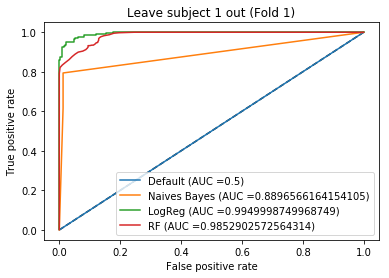


Leave subject 2 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  408 	 0 	 | 408
actual neg |  409 	 0 	 | 409
-------------------------------------
Sums       |  817 	 0 	 | 817
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.499388                  1.0   0.499388     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  390 	 18 	 | 408
actual neg |  160 	 249 	 | 409
-------------------------------------
Sums       |  550 	 267 	 | 817
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0   0.78213             0.391198   0.709091  0.955882            0.955882


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  405 	 3 	 | 408
actual neg |  261 	 148 	 | 409
-------------------------------------
Sums       |  666 	 151 	 | 817
   Accuracy  False P

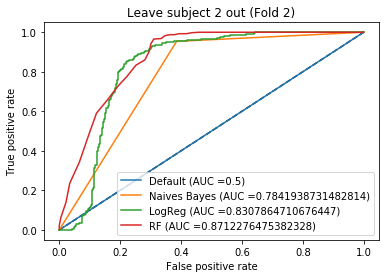


Leave subject 3 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  0 	 428 	 | 428
actual neg |  0 	 404 	 | 404
-------------------------------------
Sums       |  0 	 832 	 | 832
   Accuracy  False Positive Rate Precision  Recall  True Positive Rate
0  0.485577                  0.0       N/A     0.0                 0.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  414 	 14 	 | 428
actual neg |  47 	 357 	 | 404
-------------------------------------
Sums       |  461 	 371 	 | 832
   Accuracy  False Positive Rate  Precision   Recall  True Positive Rate
0  0.926683             0.116337   0.898048  0.96729             0.96729


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  414 	 14 	 | 428
actual neg |  7 	 397 	 | 404
-------------------------------------
Sums       |  421 	 411 	 | 832
   Accuracy  False Positiv

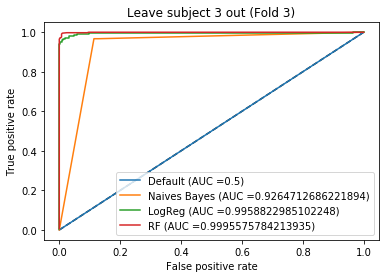


Leave subject 4 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  395 	 0 	 | 395
actual neg |  403 	 0 	 | 403
-------------------------------------
Sums       |  798 	 0 	 | 798
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.494987                  1.0   0.494987     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  312 	 83 	 | 395
actual neg |  79 	 324 	 | 403
-------------------------------------
Sums       |  391 	 407 	 | 798
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0  0.796992              0.19603   0.797954  0.789873            0.789873


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  312 	 83 	 | 395
actual neg |  47 	 356 	 | 403
-------------------------------------
Sums       |  359 	 439 	 | 798
   Accuracy  False Po

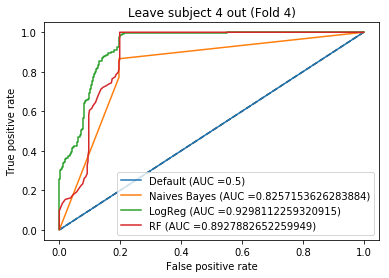

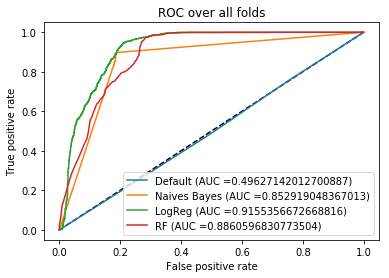

In [27]:
Accuracy0_array,Accuracy1_array, Accuracy2_array, Accuracy3_array = crossvalidate(subject1,subject2,subject3,subject4)

In [24]:
print(np.mean(Accuracy0_array))
print(np.mean(Accuracy1_array))
print(np.mean(Accuracy2_array))
print(np.mean(Accuracy3_array))


0.49436309916114074
0.827076229118189
0.8615547330703772
0.7925160571654988


C:\Users\Bhavya\Anaconda3\envs\AppliedDataScience\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


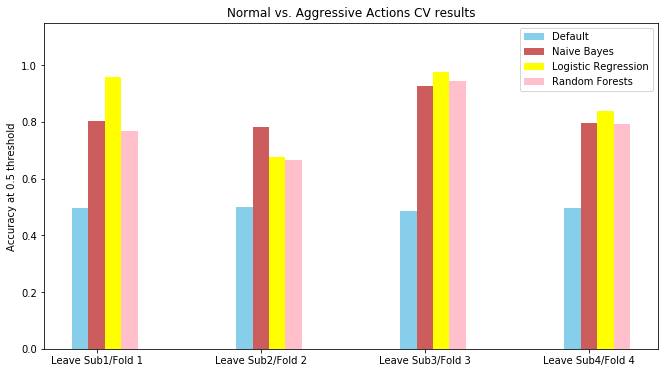

In [15]:
N = 4
ind = np.arange(N)  # the x locations for the groups
width = 0.10       # the width of the bars

fig = plt.figure(figsize=(11,6))
plt.title('Normal vs. Aggressive Actions CV results')
ax = fig.add_subplot(111)

yvals = [Accuracy0_array[0], Accuracy0_array[1],Accuracy0_array[2], Accuracy0_array[3]]
rects1 = ax.bar(ind, yvals, width, color='skyblue')
zvals = [Accuracy1_array[0], Accuracy1_array[1],Accuracy1_array[2], Accuracy1_array[3]]
rects2 = ax.bar(ind+width, zvals, width, color='indianred')
kvals = [Accuracy2_array[0], Accuracy2_array[1],Accuracy2_array[2], Accuracy2_array[3]]
rects3 = ax.bar(ind+width*2, kvals, width, color='yellow')
xvals = [Accuracy3_array[0], Accuracy3_array[1],Accuracy3_array[2], Accuracy3_array[3]]
rects4 = ax.bar(ind+width*3, xvals, width, color='pink')

ax.set_ylabel('Accuracy at 0.5 threshold')
ax.set_xticks(ind+width)
ax.set_ylim([0,1.15])
ax.set_xticklabels( ('Leave Sub1/Fold 1', 'Leave Sub2/Fold 2', 'Leave Sub3/Fold 3', 'Leave Sub4/Fold 4') )
ax.legend( (rects1[0], rects2[0], rects3[0],rects4[0]), ('Default', 'Naive Bayes','Logistic Regression', 'Random Forests'), loc = 'upper right' )


In [14]:
entire_data = pd.concat([subject1, subject2, subject3, subject4])
n,m = entire_data.shape # number of rows and columns
X = entire_data.iloc[:,:m-1]# get training input data
y = entire_data.iloc[:,m-1]
rf = RandomForestClassifier(n_estimators = 100)
rf.fit(X,y)
feature_importances = pd.DataFrame(rf.feature_importances_,
                                   index = X.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
display(feature_importances)

,importance
"L-Tri__change_quantiles__f_agg_""var""__isabs_False__qh_0.6__ql_0.0",0.014567
R-Tri__number_peaks__n_1,0.014429
"R-Ham__change_quantiles__f_agg_""var""__isabs_True__qh_0.6__ql_0.0",0.014017
"R-Thi__change_quantiles__f_agg_""var""__isabs_True__qh_1.0__ql_0.8",0.011740
"L-Tri__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",0.011546
R-Tri__minimum,0.011157
"L-Tri__change_quantiles__f_agg_""var""__isabs_False__qh_0.2__ql_0.0",0.010842
"R-Ham__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.6",0.009863
"R-Tri__change_quantiles__f_agg_""mean""__isabs_True__qh_0.2__ql_0.0",0.009848
"R-Ham__agg_linear_trend__f_agg_""var""__chunk_len_10__attr_""stderr""",0.009614


In [13]:
features_remove_4 = ["lag","ar_coefficient","mean_second_derivative_central","time_reversal_asymmetry_statistic","last_location_of_maximum","last_location_of_minimum","length","number_crossing","partial_autocorrelation","range_count","set_property","value_count","variance_larger_than_standard_deviation"]

In [14]:
def feature_space(data,features_remove):
    n,m = sub1_bowing_features.shape
    toremove = set()
    for i in range(1,m):
        column_name = data.columns[i]
        for f in features_remove:
            if f in column_name:
                toremove.add(column_name)
    return data.drop(labels = list(toremove),axis=1)

In [15]:
sub1_handshaking_features_4 = feature_space(sub1_handshaking_features,features_remove_4)
sub2_handshaking_features_4 = feature_space(sub2_handshaking_features,features_remove_4)
sub3_handshaking_features_4 = feature_space(sub3_handshaking_features,features_remove_4)
sub4_handshaking_features_4 = feature_space(sub3_handshaking_features,features_remove_4)

sub1_bowing_features_4 = feature_space(sub1_bowing_features,features_remove_4)
sub2_bowing_features_4 = feature_space(sub2_bowing_features,features_remove_4)
sub3_bowing_features_4 = feature_space(sub3_bowing_features,features_remove_4)
sub4_bowing_features_4 = feature_space(sub3_bowing_features,features_remove_4)

sub1_clapping_features_4 = feature_space(sub1_clapping_features,features_remove_4)
sub2_clapping_features_4 = feature_space(sub2_clapping_features,features_remove_4)
sub3_clapping_features_4 = feature_space(sub3_clapping_features,features_remove_4)
sub4_clapping_features_4 = feature_space(sub3_clapping_features,features_remove_4)

sub1_punching_features_4 = feature_space(sub1_punching_features,features_remove_4)
sub2_punching_features_4 = feature_space(sub2_punching_features,features_remove_4)
sub3_punching_features_4 = feature_space(sub3_punching_features,features_remove_4)
sub4_punching_features_4 = feature_space(sub3_punching_features,features_remove_4)

sub1_frontkicking_features_4 = feature_space(sub1_frontkicking_features,features_remove_4)
sub2_frontkicking_features_4 = feature_space(sub2_frontkicking_features,features_remove_4)
sub3_frontkicking_features_4 = feature_space(sub3_frontkicking_features,features_remove_4)
sub4_frontkicking_features_4 = feature_space(sub3_frontkicking_features,features_remove_4)

sub1_elbowing_features_4 = feature_space(sub1_elbowing_features,features_remove_4)
sub2_elbowing_features_4 = feature_space(sub2_elbowing_features,features_remove_4)
sub3_elbowing_features_4 = feature_space(sub3_elbowing_features,features_remove_4)
sub4_elbowing_features_4 = feature_space(sub3_elbowing_features,features_remove_4)

sub1_hammering_features_4 = feature_space(sub1_hammering_features,features_remove_4)
sub2_hammering_features_4 = feature_space(sub2_hammering_features,features_remove_4)
sub3_hammering_features_4 = feature_space(sub3_hammering_features,features_remove_4)
sub4_hammering_features_4 = feature_space(sub3_hammering_features,features_remove_4)

sub1_headering_features_4 = feature_space(sub1_headering_features,features_remove_4)
sub2_headering_features_4 = feature_space(sub2_headering_features,features_remove_4)
sub3_headering_features_4 = feature_space(sub3_headering_features,features_remove_4)
sub4_headering_features_4 = feature_space(sub3_headering_features,features_remove_4)

sub1_kneeing_features_4 = feature_space(sub1_kneeing_features,features_remove_4)
sub2_kneeing_features_4 = feature_space(sub2_kneeing_features,features_remove_4)
sub3_kneeing_features_4 = feature_space(sub3_kneeing_features,features_remove_4)
sub4_kneeing_features_4 = feature_space(sub3_kneeing_features,features_remove_4)

sub1_pulling_features_4 = feature_space(sub1_pulling_features,features_remove_4)
sub2_pulling_features_4 = feature_space(sub2_pulling_features,features_remove_4)
sub3_pulling_features_4 = feature_space(sub3_pulling_features,features_remove_4)
sub4_pulling_features_4 = feature_space(sub3_pulling_features,features_remove_4)

sub1_punching_features_4 = feature_space(sub1_punching_features,features_remove_4)
sub2_punching_features_4 = feature_space(sub2_punching_features,features_remove_4)
sub3_punching_features_4 = feature_space(sub3_punching_features,features_remove_4)
sub4_punching_features_4 = feature_space(sub3_punching_features,features_remove_4)

sub1_pushing_features_4 = feature_space(sub1_pushing_features,features_remove_4)
sub2_pushing_features_4 = feature_space(sub2_pushing_features,features_remove_4)
sub3_pushing_features_4 = feature_space(sub3_pushing_features,features_remove_4)
sub4_pushing_features_4 = feature_space(sub3_pushing_features,features_remove_4)

sub1_sidekicking_features_4 = feature_space(sub1_sidekicking_features,features_remove_4)
sub2_sidekicking_features_4 = feature_space(sub2_sidekicking_features,features_remove_4)
sub3_sidekicking_features_4 = feature_space(sub3_sidekicking_features,features_remove_4)
sub4_sidekicking_features_4 = feature_space(sub3_sidekicking_features,features_remove_4)

sub1_slapping_features_4 = feature_space(sub1_slapping_features,features_remove_4)
sub2_slapping_features_4 = feature_space(sub2_slapping_features,features_remove_4)
sub3_slapping_features_4 = feature_space(sub3_slapping_features,features_remove_4)
sub4_slapping_features_4 = feature_space(sub3_slapping_features,features_remove_4)

sub1_hugging_features_4 = feature_space(sub1_hugging_features,features_remove_4)
sub2_hugging_features_4 = feature_space(sub2_hugging_features,features_remove_4)
sub3_hugging_features_4 = feature_space(sub3_hugging_features,features_remove_4)
sub4_hugging_features_4 = feature_space(sub3_hugging_features,features_remove_4)

sub1_jumping_features_4 = feature_space(sub1_jumping_features,features_remove_4)
sub2_jumping_features_4 = feature_space(sub2_jumping_features,features_remove_4)
sub3_jumping_features_4 = feature_space(sub3_jumping_features,features_remove_4)
sub4_jumping_features_4 = feature_space(sub3_jumping_features,features_remove_4)

sub1_running_features_4 = feature_space(sub1_running_features,features_remove_4)
sub2_running_features_4 = feature_space(sub2_running_features,features_remove_4)
sub3_running_features_4 = feature_space(sub3_running_features,features_remove_4)
sub4_running_features_4 = feature_space(sub3_running_features,features_remove_4)

sub1_seating_features_4 = feature_space(sub1_seating_features,features_remove_4)
sub2_seating_features_4 = feature_space(sub2_seating_features,features_remove_4)
sub3_seating_features_4 = feature_space(sub3_seating_features,features_remove_4)
sub4_seating_features_4 = feature_space(sub3_seating_features,features_remove_4)

sub1_standing_features_4 = feature_space(sub1_standing_features,features_remove_4)
sub2_standing_features_4 = feature_space(sub2_standing_features,features_remove_4)
sub3_standing_features_4 = feature_space(sub3_standing_features,features_remove_4)
sub4_standing_features_4 = feature_space(sub3_standing_features,features_remove_4)

sub1_walking_features_4 = feature_space(sub1_walking_features,features_remove_4)
sub2_walking_features_4 = feature_space(sub2_walking_features,features_remove_4)
sub3_walking_features_4 = feature_space(sub3_walking_features,features_remove_4)
sub4_walking_features_4 = feature_space(sub3_walking_features,features_remove_4)

sub1_waving_features_4 = feature_space(sub1_waving_features,features_remove_4)
sub2_waving_features_4 = feature_space(sub2_waving_features,features_remove_4)
sub3_waving_features_4 = feature_space(sub3_waving_features,features_remove_4)
sub4_waving_features_4 = feature_space(sub3_waving_features,features_remove_4)


In [16]:
sub4_waving_features_4.shape

NameError: name 'sub4_waving_features_4' is not defined

In [16]:
subject1 = pd.concat([sub1_handshaking_features_4,sub1_punching_features_4,sub1_seating_features_4,sub1_standing_features_4,sub1_pushing_features_4,sub1_pulling_features_4,sub1_slapping_features_4,sub1_sidekicking_features_4,sub1_frontkicking_features_4,sub1_kneeing_features_4,sub1_hammering_features_4, sub1_hugging_features_4,sub1_headering_features_4,sub1_jumping_features_4,sub1_bowing_features_4,sub1_elbowing_features_4,sub1_running_features_4,sub1_walking_features_4,sub1_clapping_features_4,sub1_waving_features_4])
subject2 = pd.concat([sub2_handshaking_features_4,sub2_punching_features_4,sub2_seating_features_4,sub2_standing_features_4,sub2_pushing_features_4,sub2_pulling_features_4,sub2_slapping_features_4,sub2_sidekicking_features_4,sub2_frontkicking_features_4,sub2_kneeing_features_4,sub2_hammering_features_4, sub2_hugging_features_4,sub2_headering_features_4,sub2_jumping_features_4,sub2_bowing_features_4,sub2_elbowing_features_4,sub2_running_features_4,sub2_walking_features_4,sub2_clapping_features_4,sub2_waving_features_4])
subject3 = pd.concat([sub3_handshaking_features_4,sub3_punching_features_4,sub3_seating_features_4,sub3_standing_features_4,sub3_pushing_features_4,sub3_pulling_features_4,sub3_slapping_features_4,sub3_sidekicking_features_4,sub3_frontkicking_features_4,sub3_kneeing_features_4,sub3_hammering_features_4, sub3_hugging_features_4,sub3_headering_features_4,sub3_jumping_features_4,sub3_bowing_features_4,sub3_elbowing_features_4,sub3_running_features_4,sub3_walking_features_4,sub3_clapping_features_4,sub3_waving_features_4])
subject4 = pd.concat([sub4_handshaking_features_4,sub4_punching_features_4,sub4_seating_features_4,sub4_standing_features_4,sub4_pushing_features_4,sub4_pulling_features_4,sub4_slapping_features_4,sub4_sidekicking_features_4,sub4_frontkicking_features_4,sub4_kneeing_features_4,sub4_hammering_features_4, sub4_hugging_features_4,sub4_headering_features_4,sub4_jumping_features_4,sub4_bowing_features_4,sub4_elbowing_features_4,sub4_running_features_4,sub4_walking_features_4,sub4_clapping_features_4,sub4_waving_features_4])



Leave subject 1 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  888 	 0 	 | 888
actual neg |  897 	 0 	 | 897
-------------------------------------
Sums       |  1785 	 0 	 | 1785
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.497479                  1.0   0.497479     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  888 	 0 	 | 888
actual neg |  896 	 1 	 | 897
-------------------------------------
Sums       |  1784 	 1 	 | 1785
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.498039             0.998885   0.497758     1.0                 1.0


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  293 	 595 	 | 888
actual neg |  167 	 730 	 | 897
-------------------------------------
Sums       |  460 	 1325 	 | 1785
   Accuracy  False Po

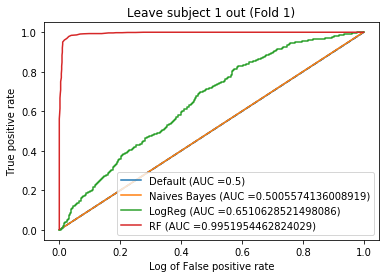


Leave subject 2 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  906 	 0 	 | 906
actual neg |  909 	 0 	 | 909
-------------------------------------
Sums       |  1815 	 0 	 | 1815
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.499174                  1.0   0.499174     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  861 	 45 	 | 906
actual neg |  82 	 827 	 | 909
-------------------------------------
Sums       |  943 	 872 	 | 1815
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0  0.930028             0.090209   0.913043  0.950331            0.950331


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  542 	 364 	 | 906
actual neg |  496 	 413 	 | 909
-------------------------------------
Sums       |  1038 	 777 	 | 1815
   Accuracy  F

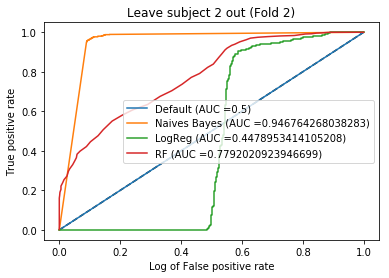


Leave subject 3 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  951 	 0 	 | 951
actual neg |  902 	 0 	 | 902
-------------------------------------
Sums       |  1853 	 0 	 | 1853
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.513222                  1.0   0.513222     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  950 	 1 	 | 951
actual neg |  533 	 369 	 | 902
-------------------------------------
Sums       |  1483 	 370 	 | 1853
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0  0.711819             0.590909   0.640593  0.998948            0.998948


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  912 	 39 	 | 951
actual neg |  248 	 654 	 | 902
-------------------------------------
Sums       |  1160 	 693 	 | 1853
   Accuracy  F

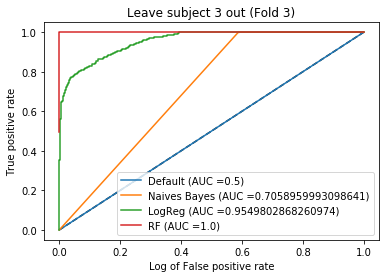


Leave subject 4 out

Default model

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  951 	 0 	 | 951
actual neg |  902 	 0 	 | 902
-------------------------------------
Sums       |  1853 	 0 	 | 1853
   Accuracy  False Positive Rate  Precision  Recall  True Positive Rate
0  0.513222                  1.0   0.513222     1.0                 1.0


Naives Bayes

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  950 	 1 	 | 951
actual neg |  533 	 369 	 | 902
-------------------------------------
Sums       |  1483 	 370 	 | 1853
   Accuracy  False Positive Rate  Precision    Recall  True Positive Rate
0  0.711819             0.590909   0.640593  0.998948            0.998948


Logistic regression

           |  PPos 	 PNeg 	 | Sums
-------------------------------------
actual pos |  912 	 39 	 | 951
actual neg |  248 	 654 	 | 902
-------------------------------------
Sums       |  1160 	 693 	 | 1853
   Accuracy  F

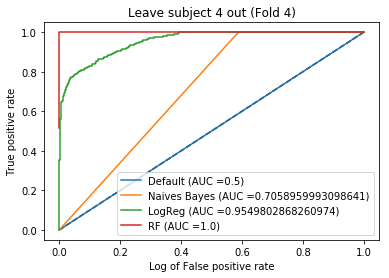

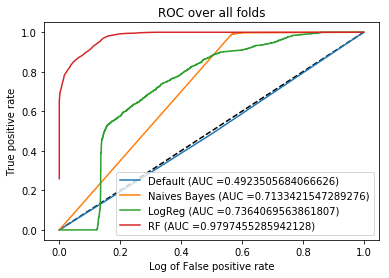

In [17]:
Accuracy0_array,Accuracy1_array, Accuracy2_array, Accuracy3_array = crossvalidate(subject1,subject2,subject3,subject4)